gathering avg returns for each security, average risk, and correlation between each pair

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv("..\Data\Weekly24-25.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\sirer\AppData\Local\Temp\ipykernel_36956\3311409751.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("..\Data\Weekly24-25.csv")


In [5]:
#convert to week to month timeframe
df=df.iloc[lambda x: x.index % 4 == 0]
df_cleaned = df


In [6]:



# Skip the first row which contains repeated headers
df_cleaned = df.iloc[1:].reset_index(drop=True)

# Extract each pair of Date and Close as its own table
AAPL = df_cleaned.iloc[:, [0, 1]].rename(columns={df.columns[0]: 'Date', df.columns[1]: 'Close'})
MSFT = df_cleaned.iloc[:, [3, 4]].rename(columns={df.columns[3]: 'Date', df.columns[4]: 'Close'})
NVDA = df_cleaned.iloc[:, [6, 7]].rename(columns={df.columns[6]: 'Date', df.columns[7]: 'Close'})
HD   = df_cleaned.iloc[:, [9, 10]].rename(columns={df.columns[9]: 'Date', df.columns[10]: 'Close'})
COST = df_cleaned.iloc[:, [12, 13]].rename(columns={df.columns[12]: 'Date', df.columns[13]: 'Close'})
XOM = df_cleaned.iloc[:, [15, 16]].rename(columns={df.columns[15]: 'Date', df.columns[16]: 'Close'})

# Optionally convert Close to numeric and Date to datetime
for stock in [AAPL, MSFT, NVDA, HD, COST]:
    stock['Date'] = pd.to_datetime(stock['Date'])
    stock['Close'] = pd.to_numeric(stock['Close'])

# Example: display AAPL data
AAPL['returns'] = AAPL['Close'].pct_change()
MSFT['returns'] = MSFT['Close'].pct_change()
NVDA['returns'] = NVDA['Close'].pct_change()
HD['returns'] = HD['Close'].pct_change()
COST['returns'] = COST['Close'].pct_change()
display(AAPL)





,Date,Close,returns
0,2024-01-26 16:00:00,192.42,NaN
1,2024-02-23 16:00:00,182.52,-0.051450
2,2024-03-22 16:00:00,172.28,-0.056103
3,2024-04-19 16:00:00,165.00,-0.042257
4,2024-05-17 16:00:00,189.87,0.150727
5,2024-06-14 16:00:00,212.49,0.119134
6,2024-07-12 16:00:00,230.54,0.084945
7,2024-08-09 16:00:00,216.24,-0.062028
8,2024-09-06 16:00:00,220.82,0.021180
9,2024-10-04 16:00:00,226.80,0.027081


In [7]:
dfs = []
i = 0
for c in df_cleaned:
    if c[0:5] != "Unnam":
        dfs.append([str(c[0:5]),df_cleaned.iloc[:, [i, i+1]].rename(columns={df.columns[i]: 'Date', df.columns[i+1]: 'Close'})])
    i += 1

for pair in dfs:
    pair[1] = pair[1][pair[1]['Date'] != 'Date']
    pair[1]['Date'] = pd.to_datetime(pair[1]['Date'])
    pair[1]['Close'] = pd.to_numeric(pair[1]['Close'])
    pair[1]['Returns'] = pair[1]['Close'].pct_change()

dfs[1][1]



,Date,Close,Returns
0,2024-01-26 16:00:00,403.93,NaN
1,2024-02-23 16:00:00,410.34,0.015869
2,2024-03-22 16:00:00,428.74,0.044841
3,2024-04-19 16:00:00,399.12,-0.069086
4,2024-05-17 16:00:00,420.21,0.052841
5,2024-06-14 16:00:00,442.57,0.053211
6,2024-07-12 16:00:00,453.55,0.024810
7,2024-08-09 16:00:00,406.02,-0.104796
8,2024-09-06 16:00:00,401.70,-0.010640
9,2024-10-04 16:00:00,416.06,0.035748


In [8]:
n = len(dfs[1][1])
print(n)

ranges = []
for i in range(n//2):
    timerange = []
    for pair in dfs:
        df = pair[1]
        if len(df) >= i + 4:
            timerange.append([pair[0],df.iloc[i:i+4]])
    ranges.append([i,timerange])

ranges[4]

13


[4,
 [['AAPL',                  Date   Close   Returns
   4 2024-05-17 16:00:00  189.87  0.150727
   5 2024-06-14 16:00:00  212.49  0.119134
   6 2024-07-12 16:00:00  230.54  0.084945
   7 2024-08-09 16:00:00  216.24 -0.062028],
  ['MSFT',
                    Date   Close   Returns
   4 2024-05-17 16:00:00  420.21  0.052841
   5 2024-06-14 16:00:00  442.57  0.053211
   6 2024-07-12 16:00:00  453.55  0.024810
   7 2024-08-09 16:00:00  406.02 -0.104796],
  ['NVDA',
                    Date   Close   Returns
   4 2024-05-17 16:00:00   92.48  0.213648
   5 2024-06-14 16:00:00  131.88  0.426038
   6 2024-07-12 16:00:00  129.24 -0.020018
   7 2024-08-09 16:00:00  104.75 -0.189492],
  ['HD',
                    Date   Close   Returns
   4 2024-05-17 16:00:00  344.21  0.026390
   5 2024-06-14 16:00:00  346.84  0.007641
   6 2024-07-12 16:00:00  359.77  0.037279
   7 2024-08-09 16:00:00  348.64 -0.030936],
  ['COST',
                    Date   Close   Returns
   4 2024-05-17 16:00:00  795.81  0

In [9]:
def get_var_name(var):
    for name, obj in globals().items():
        if obj is var:
            return name
    return None

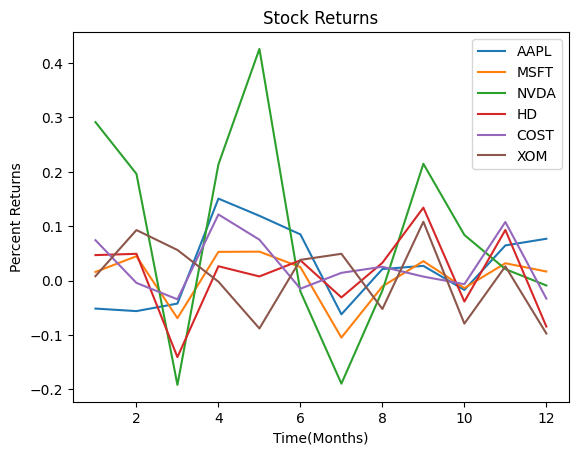

In [10]:
retlog = []
for pair in dfs:
    stockRets = []
    for r in pair[1]['Returns']:
        stockRets.append(r)
    retlog.append([pair[0],stockRets])
    
for log in retlog:
    plt.plot(log[1], label = log[0] )

plt.title('Stock Returns')
plt.xlabel('Time(Months)')
plt.ylabel('Percent Returns')
plt.legend()

In [11]:
#stock covariance 
#initialize matrix
num = len(dfs)
gamma = np.zeros((num,num),dtype=float)
j = 0
for pair in dfs:
    ar = np.average(pair[1]['Returns'].dropna())
    print(pair[0])
    v = np.zeros((num),dtype=float)
    i = 0
    for cross in dfs:
        avgReturn_other = np.average(cross[1]['Returns'].dropna())
        otherDiffs = [x-avgReturn_other for x in cross[1]['Returns'].dropna()]
        mainDiffs = [x-ar for x in pair[1]['Returns'].dropna()]
        cov = sum([a*b for a,b in zip(otherDiffs,mainDiffs)])/len(pair[1])
        v[i] = cov
        if i < len(v)-1:
            i+=1
    print(v)
    gamma[j] = v
    if j < len(gamma)-1:
        j+=1
print(gamma)


AAPL
[ 0.00452537  0.00190612  0.004075    0.00090476  0.00150242 -0.00175535]
MSFT
[ 0.00190612  0.00204829  0.00620418  0.00187058  0.00098021 -0.0003287 ]
NVDA
[ 0.004075    0.00620418  0.03010414  0.00621425  0.00445712 -0.00187306]
HD
[0.00090476 0.00187058 0.00621425 0.00480262 0.0017023  0.0016977 ]
COST
[ 0.00150242  0.00098021  0.00445712  0.0017023   0.00244911 -0.00031559]
XOM
[-0.00175535 -0.0003287  -0.00187306  0.0016977  -0.00031559  0.00415867]
[[ 0.00452537  0.00190612  0.004075    0.00090476  0.00150242 -0.00175535]
 [ 0.00190612  0.00204829  0.00620418  0.00187058  0.00098021 -0.0003287 ]
 [ 0.004075    0.00620418  0.03010414  0.00621425  0.00445712 -0.00187306]
 [ 0.00090476  0.00187058  0.00621425  0.00480262  0.0017023   0.0016977 ]
 [ 0.00150242  0.00098021  0.00445712  0.0017023   0.00244911 -0.00031559]
 [-0.00175535 -0.0003287  -0.00187306  0.0016977  -0.00031559  0.00415867]]


In [12]:

m = np.zeros(num)
for i in range(len(dfs)):
    average_return = np.average(dfs[i][1]["Returns"].dropna())
    print(dfs[i][0], average_return)
    m[i] = average_return
print(m)


AAPL 0.026308880617625197
MSFT 0.006476398903431556
NVDA 0.08487926605731806
HD 0.011052980528139947
COST 0.027729552542715318
XOM 0.005037617433489082
[0.02630888 0.0064764  0.08487927 0.01105298 0.02772955 0.00503762]


## VaR Demo

[np.float64(0.004525374180240134), np.float64(0.002048290437920837), np.float64(0.03010414382001552), np.float64(0.004802616459438211), np.float64(0.0024491097367937845), np.float64(0.004158668865890931)]


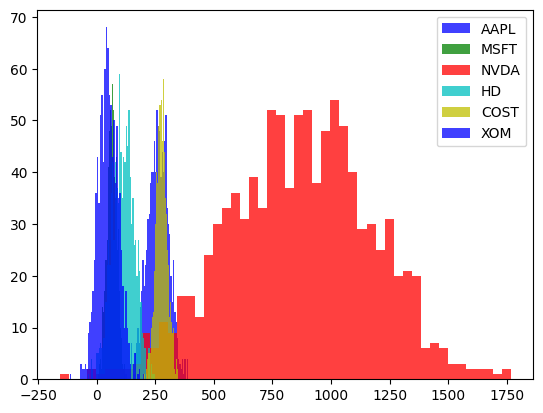

In [13]:
vols = []
for i in range(len(dfs)):
    vols.append(gamma[i][i])
print(vols)

current_portfolio_value = 10000

# figure, axis = plt.subplots(6, 1)

colors = ['b','g','r','c','y','b']

for i in range(len(m)):
    stock_sim_ret = np.random.normal(m[i],vols[i],1000)
    portfolio_value_changes = current_portfolio_value * stock_sim_ret
    plt.hist(portfolio_value_changes, bins=50, alpha=0.75, color=colors[i%len(colors)],label = dfs[i][0])
    plt.legend()
    

# aapl_simulated_returns = np.random.normal(m[0], vols[0],1000)
# portfolio_value_changes = current_portfolio_value * aapl_simulated_returns
# plt.hist(portfolio_value_changes, bins=50, alpha=0.75, color='b')
